<h2> O objetivo aqui é com base nos dados dos clientes, identificar padrões e indicar quais clientes serão classificados como possíveis inadimplentes. 

⭐Os dados e roteiro básico seguem o livro abaixo. A ideia aqui é utilizar parte dos conceitos da disciplina de INF 494 e implementar diferentes algoritmos, principalmente os baseados em árvores. 

⭐Em outro jupyter notebook será disponibilizado a análise exploratória e limpeza de dados já realizada.<h2> 

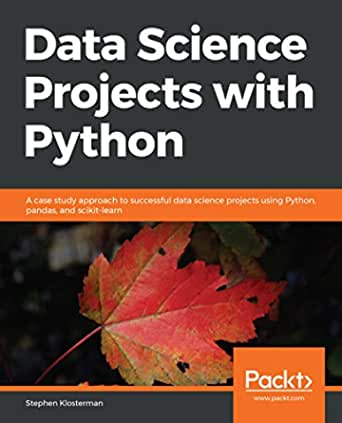

<h3>Importação de BBT<h3>

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib
matplotlib.rcParams['figure.dpi']
font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

<h3>Entrada e Informações dos Dados (já passaram por limpeza) <h3>

In [125]:
from google.colab import drive
drive.mount('/content/gdrive');
data=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/DATA_PROJECTS/Chapter_1_cleaned_data.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [126]:
data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,0,0,0,0,1


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [128]:
#RETIRA DADOS CATEGÓRICOS STRING ==> JÁ FOI TRANSFORMADO EM VARIÁVEIS BINÁRIAS DUMMIES
data.drop(["EDUCATION_CAT"],axis=1,inplace=True)
data.drop(["EDUCATION"],axis=1,inplace=True)
data.drop(["ID"],axis=1,inplace=True)

In [129]:
data.head(3)

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
0,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,1


<h4>Aqui é possível observar que em 22% dos dados, ocorrem inadimplências<h4>

In [130]:
data['default payment next month'].describe()

count    26664.000000
mean         0.221797
std          0.415463
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [131]:
data['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [132]:
pd.set_option('display.max_columns', None)
data.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
0,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,1
3,50000,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,1


In [185]:
features_all=['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','graduate school', 'high school', 'none',
       'others', 'university']

22

Text(0.5, 1.0, 'Gráfico de Correlação entre variáveis')

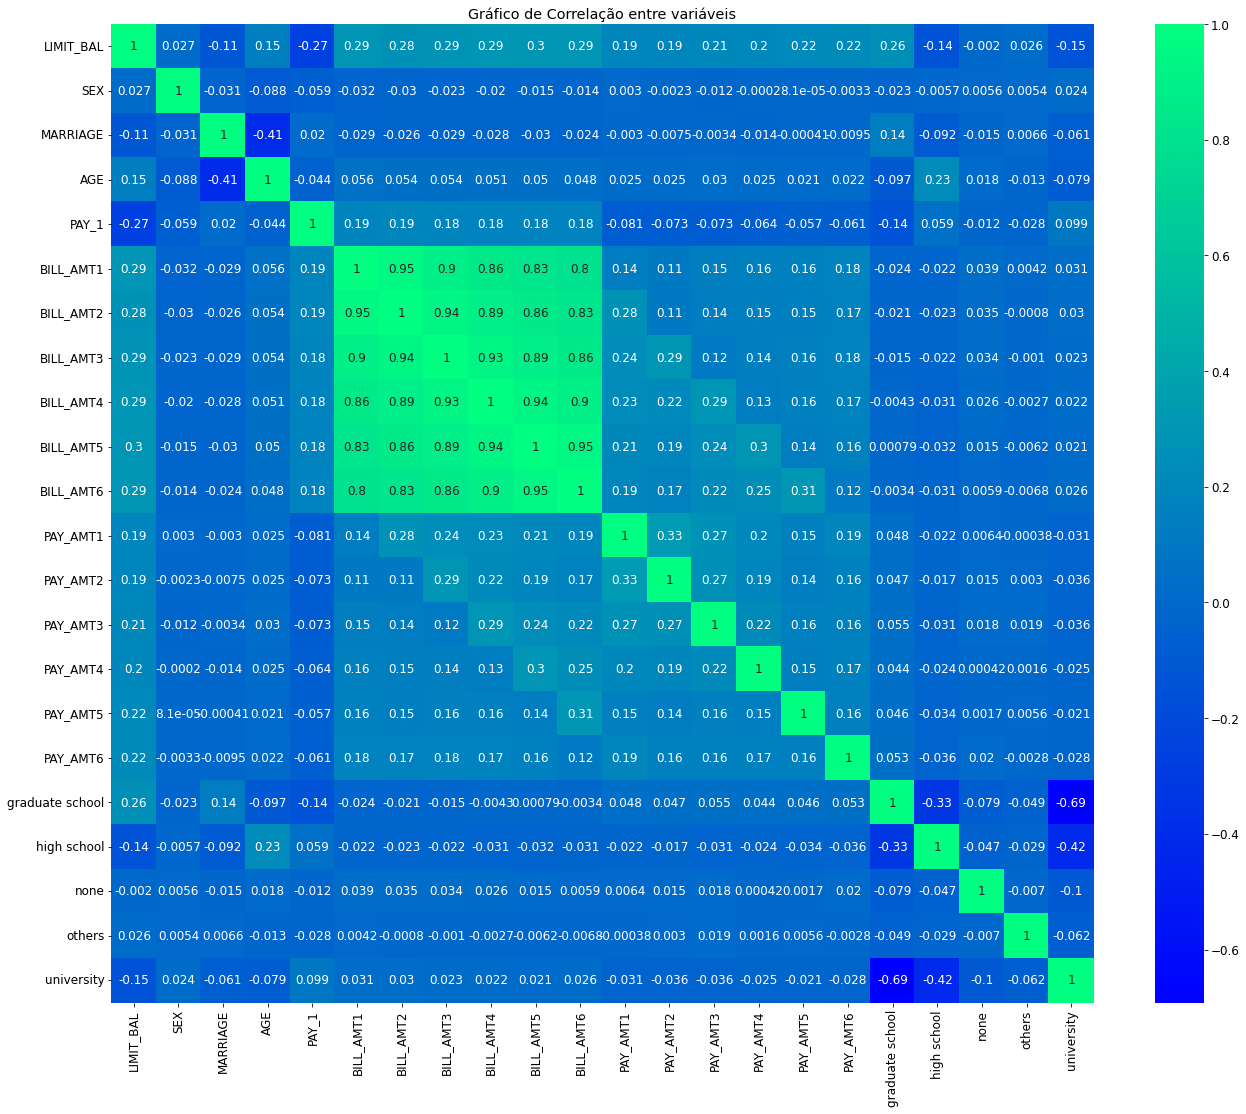

In [134]:
#Identificar correlação entre variáveis
ax,fig=plt.subplots(figsize=(22,18))
ax=sns.heatmap(data[features_all].corr(),cbar=True,cmap="winter",annot=True)
ax.tick_params(colors='black', which='both')
ax.set_title("Gráfico de Correlação entre variáveis")

<h4>F classifier - identifica a partir das variância explicada (anova) quais features tem importância. O f_classifier funciona bem com variáveis de entrada númericas e saída categórica, portanto, vou separar as variáveis de entrada entre categóricas e numéricas.<h4>

In [135]:
features_cat=['SEX', 'MARRIAGE', 'AGE', 'PAY_1','graduate school', 'high school', 'none',
       'others', 'university']
features_num=['LIMIT_BAL',
        'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

from sklearn.feature_selection import f_classif
[f_stat,f_p_value]=f_classif(data[features_num].values,data["default payment next month"])

In [136]:
data_features_stats=pd.DataFrame(index=features_num)

In [137]:
data_features_stats["stats"]=f_stat
data_features_stats["p_value"]=f_p_value
data_features_stats.sort_values('p_value')

,stats,p_value
LIMIT_BAL,651.324071,5.838366e-142
PAY_AMT1,140.612679,2.358354e-32
PAY_AMT2,101.408321,8.256124e-24
PAY_AMT3,90.023873,2.542641e-21
PAY_AMT5,85.843295,2.090120e-20
PAY_AMT6,80.420784,3.219565e-19
PAY_AMT4,79.640021,4.774112e-19
BILL_AMT1,11.218406,8.110226e-04
BILL_AMT3,5.722938,1.675157e-02
BILL_AMT2,5.668454,1.727965e-02


Text(0.5, 1.0, 'Gráfico de Correlação entre variáveis numéricas')

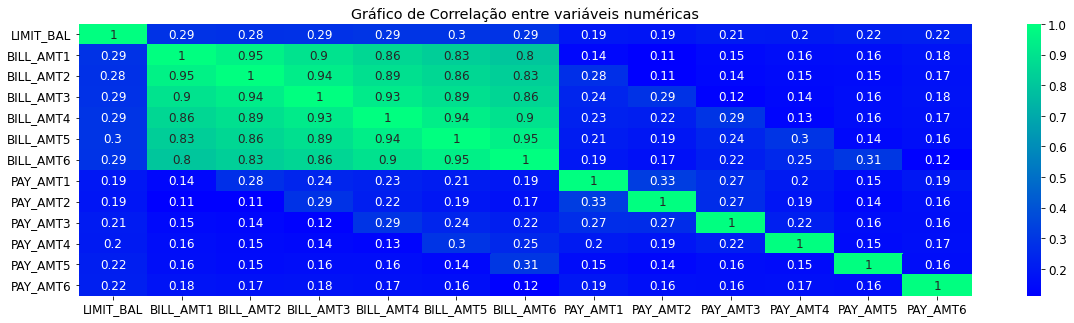

In [138]:
#Identificar correlação entre variáveis
ax,fig=plt.subplots(figsize=(20,5))
ax=sns.heatmap(data[features_num].corr(),cbar=True,cmap="winter",annot=True)
ax.tick_params(colors='black', which='both')
ax.set_title("Gráfico de Correlação entre variáveis numéricas")

<h4>Melhores Features para Variáveis Númericas num Percentil 20<h4>

In [139]:
from sklearn.feature_selection import SelectPercentile
selector=SelectPercentile(f_classif,percentile=20)
selector.fit(data[features_num].values,data["default payment next month"])

SelectPercentile(percentile=20)

In [140]:
best_features=selector.get_support()
print(best_features)

[ True False False False False False False  True  True False False False
 False]


In [141]:
best_features=[features_num[counter] for counter in range(len(features_num)) \
               if best_features[counter]]

In [142]:
print(best_features)

['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2']


Text(0.5, 1.0, 'Histograma de Limit_Bal x default payment')

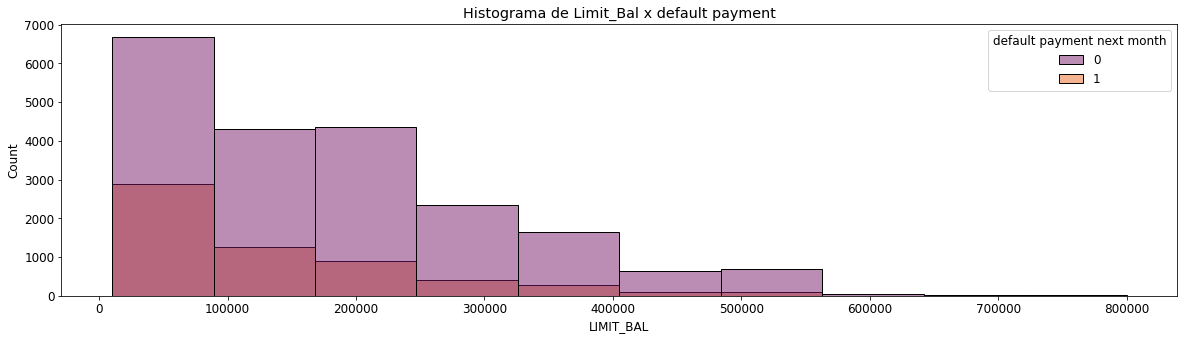

In [143]:
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=data, x='LIMIT_BAL',hue="default payment next month",palette='inferno',bins=10)
ax.set_title("Histograma de Limit_Bal x default payment")

<h4>Melhores Features para Variáveis Categóricas num Percentil 20<h4>

In [144]:
from sklearn.feature_selection import mutual_info_classif
info_=mutual_info_classif(data[features_cat].values,data["default payment next month"])
info_

array([0.00274932, 0.00291462, 0.00203302, 0.07692072, 0.00118064,
       0.        , 0.        , 0.00142208, 0.        ])

In [145]:
from sklearn.feature_selection import SelectPercentile
selector=SelectPercentile(mutual_info_classif,percentile=20)
selector.fit(data[features_cat].values,data["default payment next month"])

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x7fa492677170>)

In [146]:
best_features=selector.get_support()

best_features=[features_cat[counter] for counter in range(len(features_cat)) \
               if best_features[counter]]

print(best_features)

['SEX', 'PAY_1']


Text(0.5, 1.0, 'AGE Histogram')

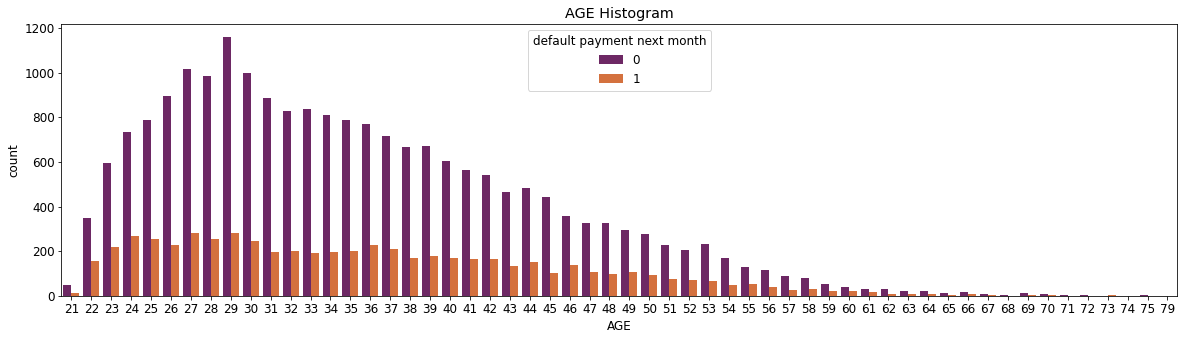

In [147]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=data, x='AGE',hue="default payment next month", orient='v',palette='inferno')
ax.set_title('AGE Histogram')

Text(0.5, 1.0, 'PAY_1 Histogram')

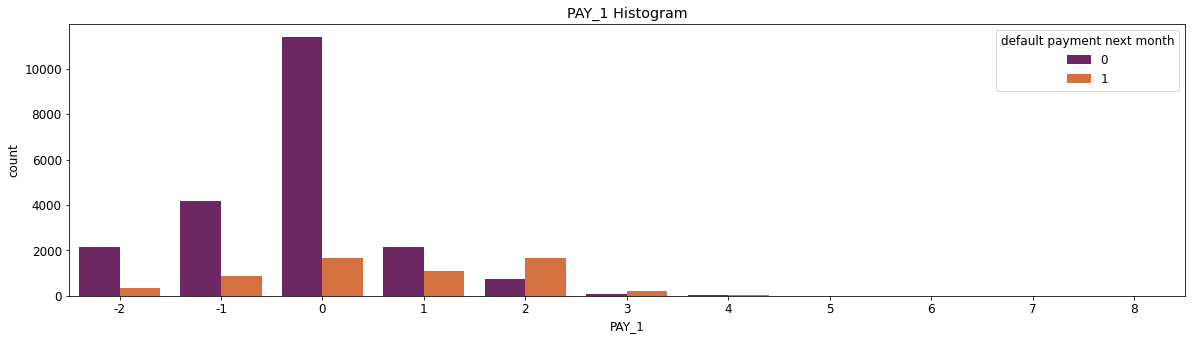

In [148]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=data, x='PAY_1',hue="default payment next month", orient='v',palette='inferno')
ax.set_title('PAY_1 Histogram')

<h4>Para modelos de regressão linear, as features devem se comportar linearmente com log odds ratio, isto é, a combinação linear das features gera log(p/q). Para tal, devemos avaliar quais variáveis podem ser usadas no modelo.<h4>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


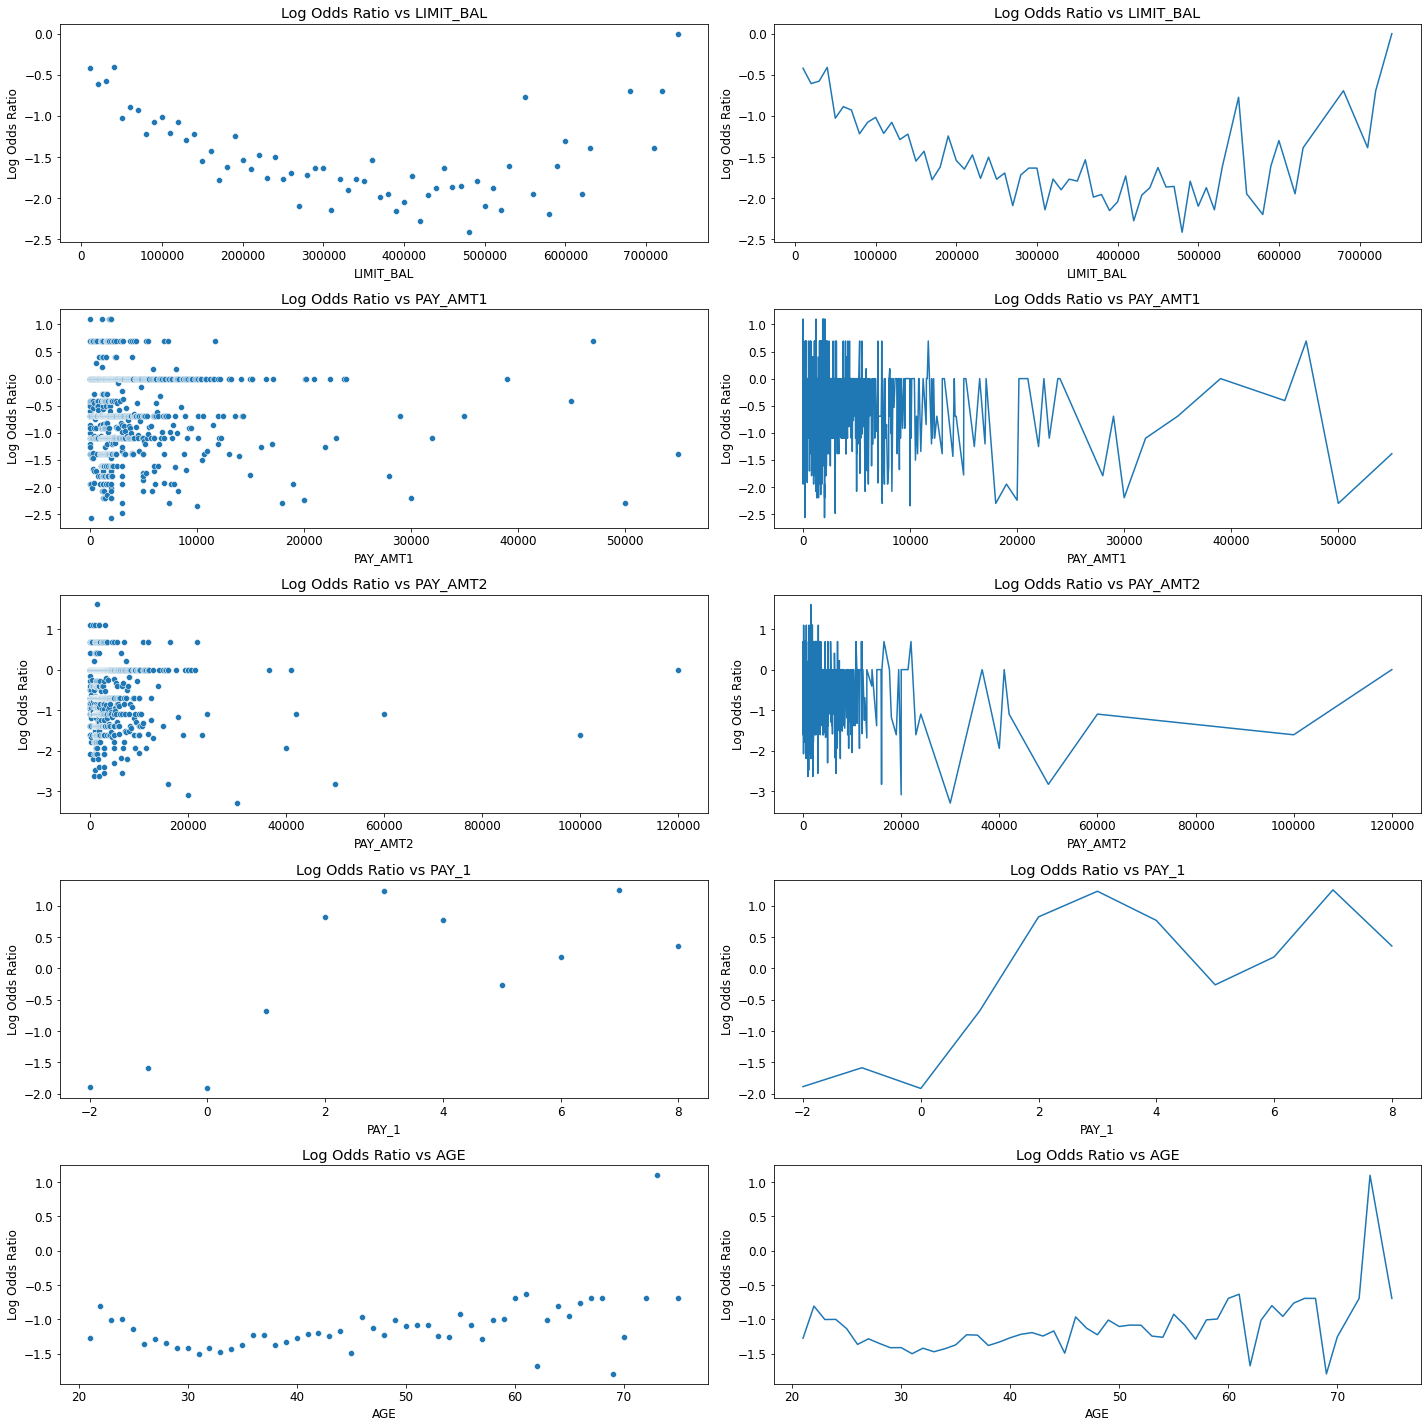

In [149]:
principal_features=['LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2','PAY_1','AGE']
fig,axs=plt.subplots(len(principal_features),2,figsize=(20,20))

for feat_index in range(0,len(principal_features)):
  p=data.groupby(by=principal_features[feat_index]).mean()['default payment next month'].values
  q=abs(1-p)
  log_odds_ratio=np.log(p/q)
  sns.scatterplot(x=data.groupby(by=principal_features[feat_index]).mean().index,y=log_odds_ratio,ax=axs[feat_index,0])
  sns.lineplot(x=data.groupby(by=principal_features[feat_index]).mean().index,y=log_odds_ratio,ax=axs[feat_index,1])
  axs[feat_index,0].set_ylabel('Log Odds Ratio')
  axs[feat_index,0].set_title('Log Odds Ratio vs '+str(principal_features[feat_index]))
  axs[feat_index,1].set_ylabel('Log Odds Ratio')
  axs[feat_index,1].set_title('Log Odds Ratio vs '+str(principal_features[feat_index]))

fig.tight_layout()

<h6>⌛**EMBORA** PAY_1 E LIMIT_BAL PARECEM REPRESENTAR UMA FUNÇÃO POLINOMIAL E QUADRÁTICA RESPECTIVAMENTE, SEM ALTERAR AS FEATURES, TENTAREI USÁ-LAS NO MODELO DE REG. LOGÍSTICA.<H6> Seria interessante aqui fazer modificações nas features antes de aplicá-las ao modelo.

<h4>Divisão de dados em teste e treino<h4>

In [150]:
X_=data[['PAY_1','LIMIT_BAL']]
Y_=data['default payment next month']

In [151]:
X_train, X_test, y_train , y_test =train_test_split(X_,Y_,test_size=0.2,random_state=24,stratify=Y_)

<h3>Treinando Modelo Reg Logística<h3>

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model_reglog=LogisticRegression()
model_reglog.solver="liblinear"
model_reglog.penalty="l1"

In [154]:
model_reglog.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

<h5>Avaliando Modelo<h5>

In [155]:
from sklearn import metrics

In [156]:
metrics.accuracy_score(y_test,model_reglog.predict(X_test))

0.8123007687980499

In [157]:
metrics.roc_auc_score(y_test,model_reglog.predict_proba(X_test)[:,1])

0.7185449490268767

<h4>Ajustando Hiperparâmetros<h4>

In [158]:
from sklearn.model_selection import StratifiedKFold

In [159]:
n_folds=4
k_folds=StratifiedKFold(n_folds,shuffle=True)

In [160]:
C=[10**(i) for i in range(-8,5)]
C

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [161]:
#DIVIDIR EM TREINO E TESTE
#UM C ->PARA CADA K_FOLD
columns_fold=[]
for i in range(1,5):
    columns_fold.append("fold"+str(i)+"_train")
    columns_fold.append("fold"+str(i)+"_test")  
columns_fold

['fold1_train',
 'fold1_test',
 'fold2_train',
 'fold2_test',
 'fold3_train',
 'fold3_test',
 'fold4_train',
 'fold4_test']

In [162]:
model_reglog.solver="liblinear"
model_reglog.penalty="l1"
fold=np.zeros((len(C),8))
counter=0

for train_index,test_index in k_folds.split(X_,Y_):    
        for c in range(0,len(C)): 
            model_reglog.C=C[c]
            model_reglog.fit(X_.loc[train_index],Y_.loc[train_index])
            fold[c,counter]=metrics.roc_auc_score(Y_.loc[train_index].values,model_reglog.predict_proba(X_.loc[train_index])[:,1])
            fold[c,counter+1]=metrics.roc_auc_score(Y_.loc[test_index].values,model_reglog.predict_proba(X_.loc[test_index])[:,1])
        counter+=2

In [163]:
data_fold=pd.DataFrame(data=fold,columns=columns_fold)

In [164]:
data_fold["C"]=C
data_fold

,fold1_train,fold1_test,fold2_train,fold2_test,fold3_train,fold3_test,fold4_train,fold4_test,C
0,0.617098,0.623357,0.617474,0.622247,0.617080,0.623522,0.623059,0.605653,1.000000e-08
1,0.617098,0.623357,0.617474,0.622247,0.617080,0.623522,0.623059,0.605653,1.000000e-07
2,0.617098,0.623357,0.617474,0.622247,0.617080,0.623522,0.623059,0.605653,1.000000e-06
3,0.617098,0.623357,0.617474,0.622247,0.617080,0.623522,0.623059,0.605653,1.000000e-05
4,0.617098,0.623357,0.617474,0.622247,0.617080,0.623522,0.623059,0.605653,1.000000e-04
5,0.683458,0.683354,0.680979,0.688415,0.682185,0.686857,0.683317,0.670965,1.000000e-03
6,0.714722,0.713336,0.712801,0.719229,0.716009,0.709504,0.714094,0.715184,1.000000e-02
7,0.714254,0.713377,0.712494,0.719353,0.715929,0.708487,0.714210,0.715504,1.000000e-01
8,0.714122,0.713238,0.712352,0.719237,0.715889,0.708443,0.714115,0.715399,1.000000e+00
9,0.714254,0.713378,0.712494,0.719353,0.715889,0.708443,0.714121,0.715399,1.000000e+01


In [165]:
import seaborn as sns

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

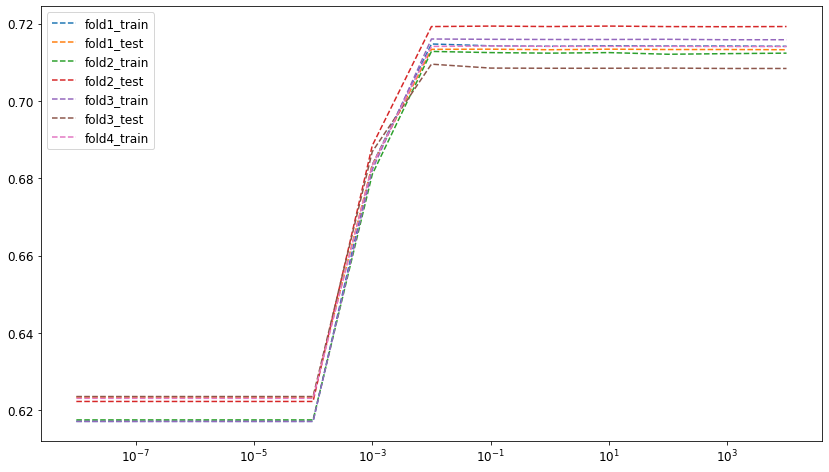

In [166]:
plt.subplots(figsize=(14,8))
ax=plt.plot(data_fold["C"].values,data_fold.iloc[:,:-2].values,linestyle="--")
plt.xscale('log')
plt.legend(data_fold.iloc[:,:-2].columns)
plt

In [167]:
X_=data[['PAY_1','LIMIT_BAL','AGE']]
Y_=data['default payment next month']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_, Y_.values,
test_size=0.2, random_state=24)

In [169]:
print(X_train.shape)
print(X_test.shape)

(21331, 3)
(5333, 3)


In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [172]:
from sklearn.pipeline import Pipeline

In [173]:
min_max_sc=MinMaxScaler()
scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc), ('model', lr)])

In [174]:
scale_lr_pipeline.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [175]:
#lista de hiperparâmetros
C_vals=[10**(i) for i in range(-8,5)]
C_vals

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [176]:
from sklearn.metrics import roc_auc_score,roc_curve

def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X, Y):
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    Data_type = object
    cv_test_roc =  np.empty((n_folds,len(C_vals),3),dtype = Data_type)

    for c_val_counter in range(len(C_vals)):
        #Modifica hiperparâmetro C
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Contagem de de k folds
        fold_counter = 0
        # Para cada divisão em k fold, pegar os índices de treino e teste de cada k
        for train_index, test_index in k_folds.split(X, Y):
            #divide dados em treino e teste
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Treina o modelo com os dados
            pipeline.fit(X_cv_train, y_cv_train)

            #Armazena o resultado da métrica ROC AUC para treino
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Armazena o resultado da métrica ROC AUC para teste
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Testing ROC curves for each fold
            cv_test_roc[fold_counter][c_val_counter][0],cv_test_roc[fold_counter][c_val_counter][1],cv_test_roc[fold_counter][c_val_counter][2]= roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(pipeline.get_params()['model__C']))
        
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [177]:
n_folds=5
k_folds=StratifiedKFold(n_folds,shuffle=True)
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search_pipe(k_folds, C_vals, scale_lr_pipeline, X_.values, Y_.values)

Done with C = 1e-08
Done with C = 1e-07
Done with C = 1e-06
Done with C = 1e-05
Done with C = 0.0001
Done with C = 0.001
Done with C = 0.01
Done with C = 0.1
Done with C = 1
Done with C = 10
Done with C = 100
Done with C = 1000
Done with C = 10000


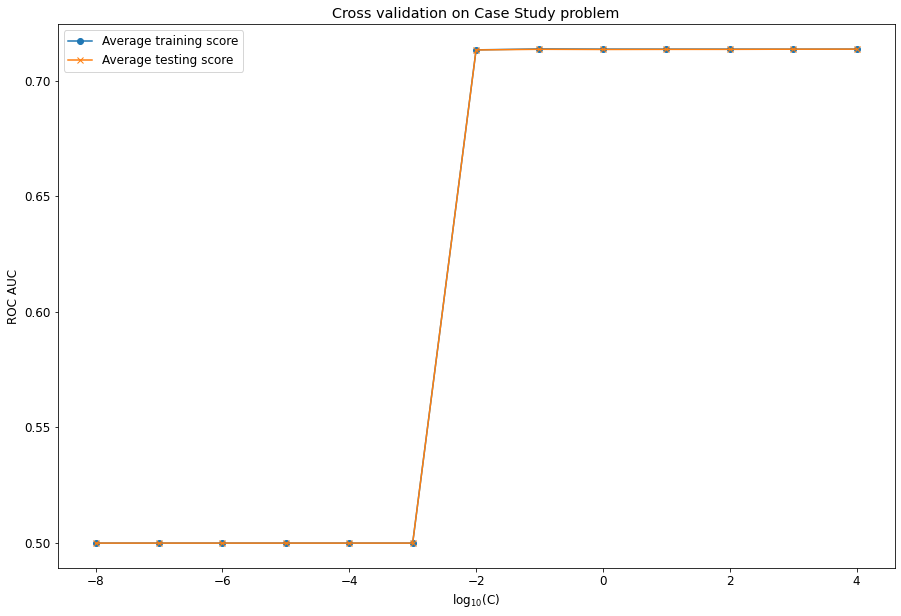

In [178]:
fig,ax=plt.subplots(figsize=(15,10))
C_val_exponents=[i for i in range(-8,5)]
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',
        label='Average training score')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',
        label='Average testing score')
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()
plt.title('Cross validation on Case Study problem')

cr_="black"
ax.tick_params(colors=cr_, which='both')
ax.yaxis.label.set_color(cr_)
ax.xaxis.label.set_color(cr_)
ax.title.set_color(cr_)

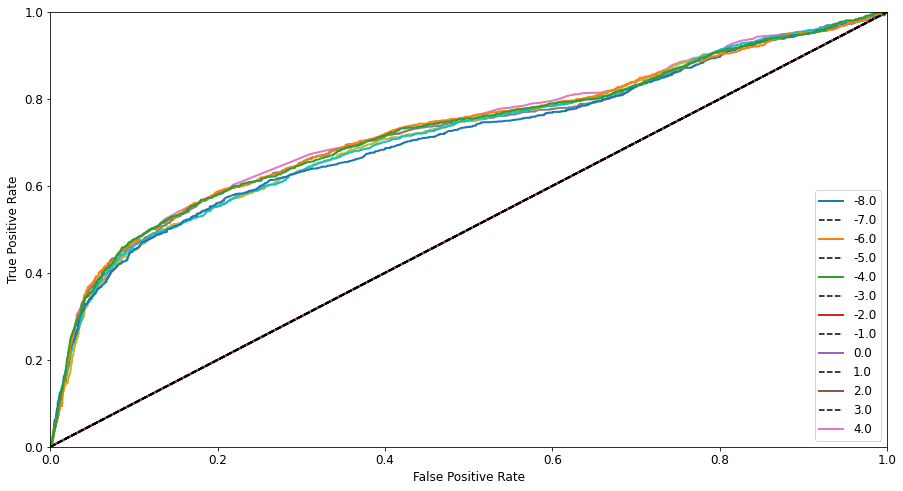

In [179]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
fig,axs=plt.subplots(1,figsize=(15,8))
for C in range(0,len(C_vals)):
    #sns.lineplot(cv_test_roc[0][C][0],cv_test_roc[0][C][1],ax=axs[C])
    plot_roc_curve(cv_test_roc[0][C][0],cv_test_roc[0][C][1])
plt.legend(np.log10(C_vals))

In [180]:
print("ROC AUC TESTE MÁXIMO MÉDIAS DOS 5 FOLDS: " +str(cv_test_roc_auc.mean(axis=0).max()))
print("ÍNDICE COLUNA: "+ str(cv_test_roc_auc.mean(axis=0).argmax()))
print("ROC AUC TREINO MÁXIMO MÉDIAS DOS 5 FOLDS: " + str(cv_train_roc_auc.mean(axis=0)[cv_test_roc_auc.mean(axis=0).argmax()]))

ROC AUC TESTE MÁXIMO MÉDIAS DOS 5 FOLDS: 0.7136284304180176
ÍNDICE COLUNA: 12
ROC AUC TREINO MÁXIMO MÉDIAS DOS 5 FOLDS: 0.7136560288571431


<h3>Árvore de Classificação<h3>

In [181]:
import graphviz

In [182]:
from sklearn import tree

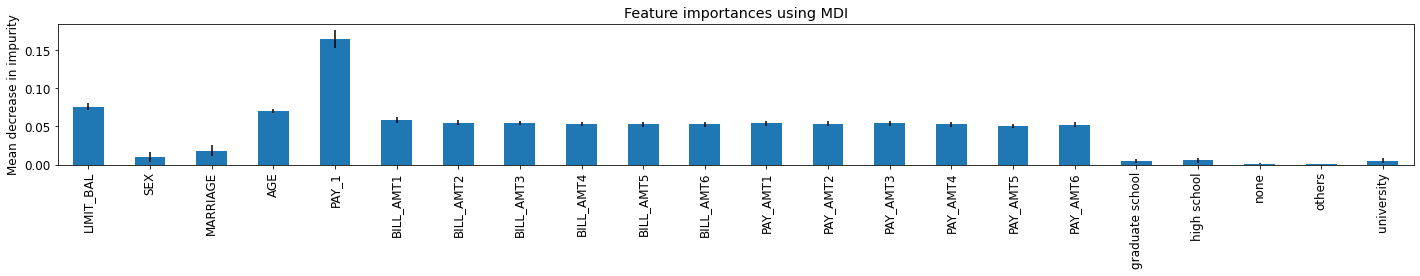

In [188]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)

X=data.drop(columns='default payment next month',axis=1)
X=X[features_all]
Y=data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, Y.values,
test_size=0.2, random_state=24)


clf = clf.fit(X_train, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features_all)

fig, ax = plt.subplots(figsize=(20,4))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X[['LIMIT_BAL','AGE','PAY_1','BILL_AMT1']], data['default payment next month'].values,
test_size=0.2, random_state=24)

In [213]:
dt=tree.DecisionTreeClassifier(max_depth=5)

In [214]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [215]:
features_name=list(data.columns[:-1])
features_name.remove("default payment next month")

In [231]:
dot_data=tree.export_graphviz(dt,out_file=None,filled=True,rounded=True,feature_names=['LIMIT_BAL','AGE','PAY_1','BILL_AMT1'], \
                              proportion=True,class_names=["Defaulted","Not Defaulted"])

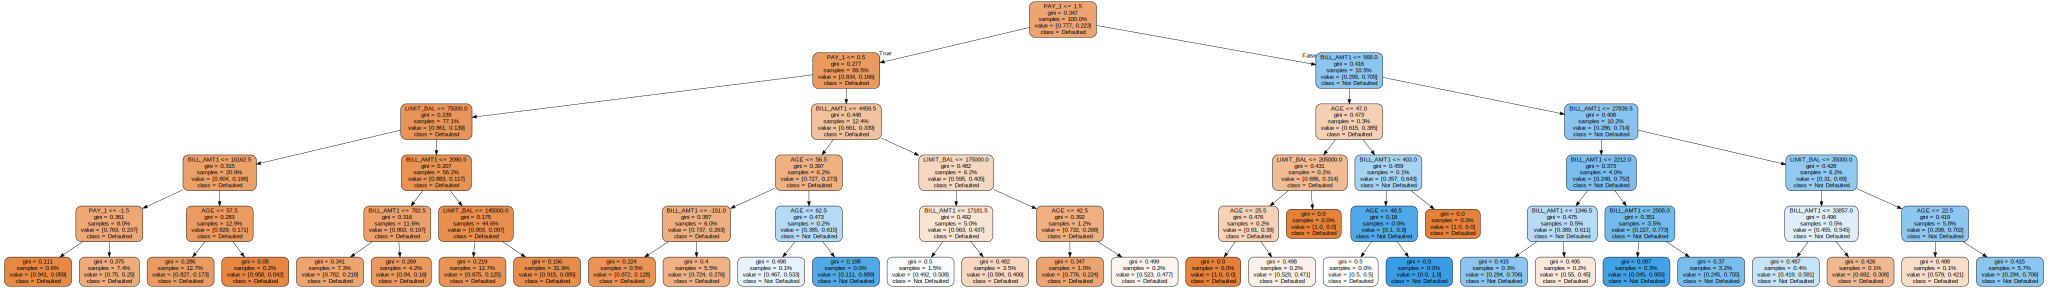

In [232]:
graphviz.Source(dot_data)

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
X.shape

(26664, 22)

In [220]:
params_tree={"max_depth":[1,2,4,6,8,10,12]}

In [221]:
cv=GridSearchCV(dt,param_grid=params_tree,scoring='roc_auc',n_jobs=None,refit=True,
               cv=4, verbose=1,pre_dispatch=None,error_score=np.nan,return_train_score=True)

In [222]:
cv.fit(X_train,y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [223]:
cv_results_df=pd.DataFrame(cv.cv_results_)

In [224]:
cv_results_df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.006133,0.000994,0.002668,0.000197,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.008605,0.000230,0.002616,0.000087,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,6,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.015380,0.000618,0.003008,0.000110,4,{'max_depth': 4},0.734793,0.739697,0.756121,0.743661,0.743568,0.007899,2,0.753308,0.753067,0.746607,0.750706,0.750922,0.002691


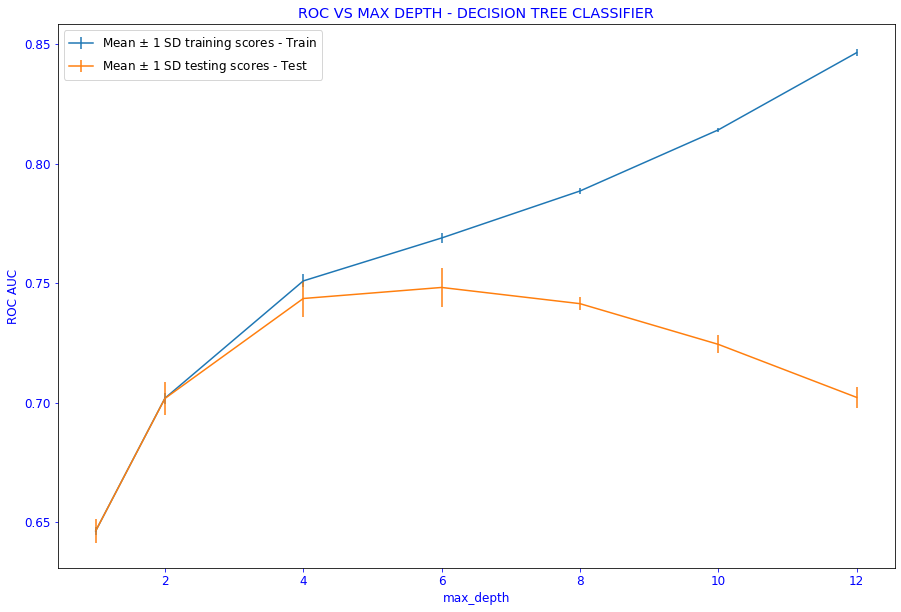

In [225]:
fig,ax=plt.subplots(figsize=(15,10))
ax.errorbar(cv_results_df['param_max_depth'],cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'], label='Mean $\pm$ 1 SD training scores - Train')
ax.errorbar(cv_results_df['param_max_depth'],cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],label='Mean $\pm$ 1 SD testing scores - Test')
            
plt.legend()
plt.ylabel('ROC AUC')
plt.xlabel('max_depth')
plt.title("ROC VS MAX DEPTH - DECISION TREE CLASSIFIER")
ax.tick_params(colors='Blue', which='both')
ax.yaxis.label.set_color("Blue")
ax.xaxis.label.set_color("Blue")
ax.title.set_color("Blue")

In [226]:
print("==============================================Melhor Resultado============================================")
print("Treino:%f.2"%(cv_results_df['mean_train_score'][cv_results_df['params']=={'max_depth': 6}]))
print("Teste:%f.2"%(cv_results_df['mean_test_score'][cv_results_df['params']=={'max_depth': 6}]))

==============================================Melhor Resultado============================================
Treino:0.768884.2
Teste:0.748190.2


<h3>Floresta Aleatória<h3>

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rf=RandomForestClassifier()

In [229]:
rf_params={'n_estimators':list(range(10,110,10)),'max_depth':list(range(1,31,5))}
rf_params

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [1, 6, 11, 16, 21, 26]}

In [230]:
cv_rf_ex=GridSearchCV(rf,param_grid=rf_params,scoring='roc_auc',pre_dispatch=None,return_train_score=True)

In [233]:
cv_rf_ex.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 6, 11, 16, 21, 26],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc')

In [234]:
cv_results_rf_df=pd.DataFrame(cv_rf_ex.cv_results_)
cv_results_rf_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038104,0.001992,0.005834,0.000198,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.685033,0.709608,0.697763,0.710916,0.691295,0.698923,0.010104,59,0.703221,0.709034,0.707723,0.694133,0.697412,0.702305,0.005765
1,0.069532,0.003332,0.007937,0.000146,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.692593,0.705067,0.689272,0.721310,0.695790,0.700806,0.011526,58,0.704153,0.698761,0.697252,0.702275,0.698762,0.700241,0.002559
2,0.101227,0.002830,0.010712,0.000797,1,30,"{'max_depth': 1, 'n_estimators': 30}",0.686736,0.712134,0.698767,0.723946,0.698807,0.704078,0.012778,56,0.702736,0.710754,0.711116,0.705674,0.701305,0.706317,0.004027
3,0.137273,0.003038,0.014373,0.003202,1,40,"{'max_depth': 1, 'n_estimators': 40}",0.696594,0.709390,0.701111,0.723889,0.698948,0.705986,0.009936,54,0.711833,0.708270,0.710873,0.707649,0.702799,0.708285,0.003156
4,0.175136,0.006133,0.015425,0.000217,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.699426,0.709833,0.698749,0.724237,0.703079,0.707065,0.009444,52,0.712814,0.708230,0.707154,0.707290,0.705184,0.708135,0.002541


In [235]:
#plotagem 3D

import plotly.express as px
fig = px.scatter_3d(cv_results_rf_df, x="param_max_depth", y="mean_test_score", z="param_n_estimators")
fig.show()

In [236]:
lista_de_profundidades=cv_results_rf_df["param_max_depth"].unique().tolist()

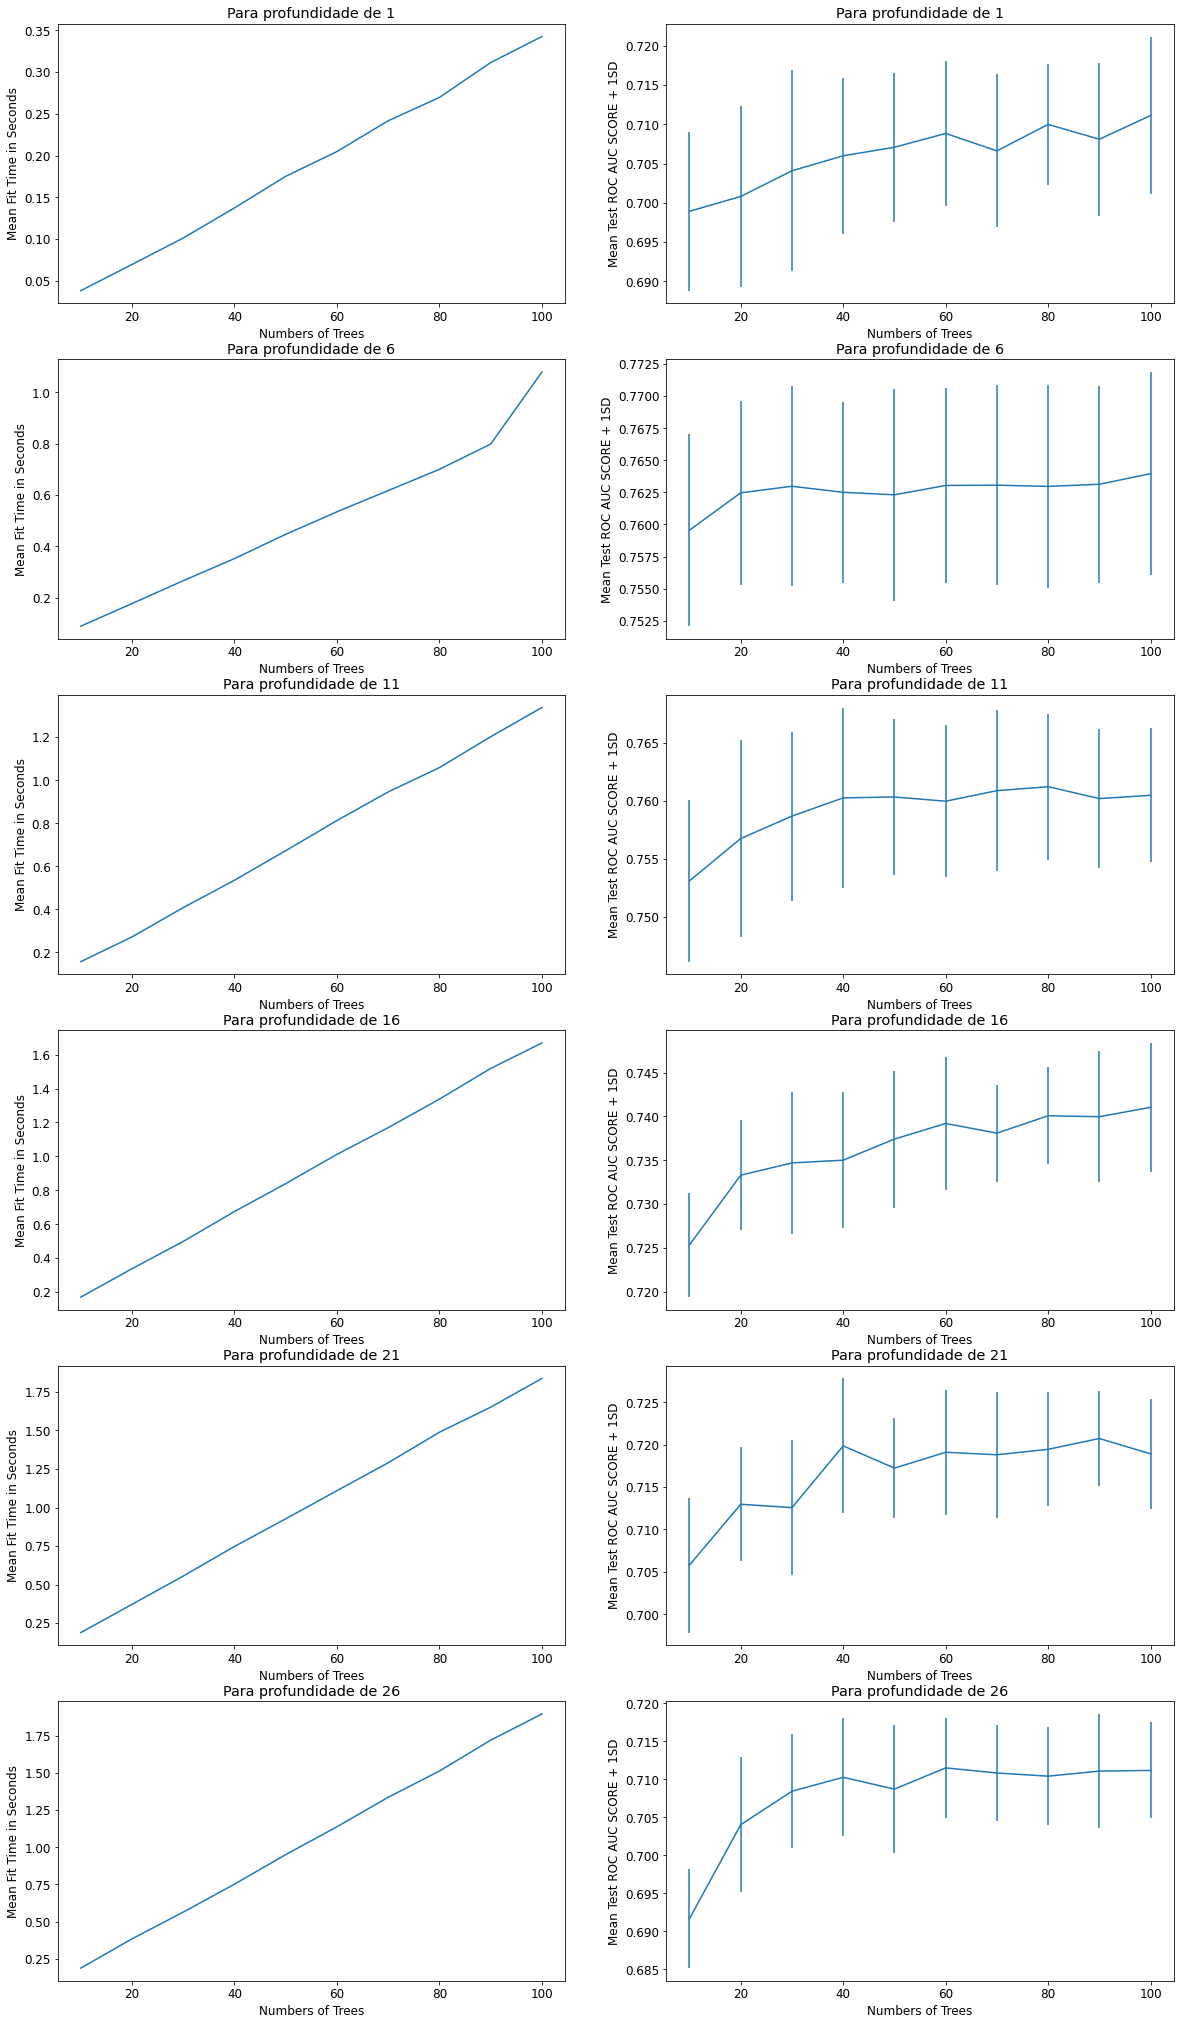

In [237]:
fig,axs=plt.subplots(len(lista_de_profundidades),2,figsize=(20,len(lista_de_profundidades)*6))

for n in range(0,len(lista_de_profundidades)):
  axs[n,0].plot(cv_results_rf_df['param_n_estimators'][cv_results_rf_df['param_max_depth']==lista_de_profundidades[n]],
                cv_results_rf_df['mean_fit_time'][cv_results_rf_df['param_max_depth']==lista_de_profundidades[n]])
  
  axs[n,1].errorbar(cv_results_rf_df['param_n_estimators'][cv_results_rf_df['param_max_depth']==lista_de_profundidades[n]],cv_results_rf_df['mean_test_score'][cv_results_rf_df['param_max_depth']==lista_de_profundidades[n]],
            yerr=cv_results_rf_df['std_test_score'][cv_results_rf_df['param_max_depth']==lista_de_profundidades[n]])
  
  axs[n,0].set_ylabel("Mean Fit Time in Seconds")
  axs[n,0].set_xlabel("Numbers of Trees")
  axs[n,1].set_ylabel("Mean Test ROC AUC SCORE + 1SD")
  axs[n,1].set_xlabel("Numbers of Trees")

  axs[n,0].set_title("Para profundidade de %i" %(lista_de_profundidades[n]))
  axs[n,1].set_title("Para profundidade de %i" %(lista_de_profundidades[n]))


In [238]:
cv_results_rf_df.sort_values(by='mean_test_score',ascending=False).head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
19,1.079424,0.165673,0.051507,0.008414,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.756865,0.763476,0.766428,0.777544,0.755482,0.763959,0.007913,1,0.782869,0.781469,0.780831,0.779513,0.781491,0.781235,0.001088
18,0.798636,0.009174,0.036391,0.000816,6,90,"{'max_depth': 6, 'n_estimators': 90}",0.755130,0.762436,0.765215,0.776544,0.756340,0.763133,0.007680,2,0.782028,0.781906,0.780348,0.778249,0.782245,0.780955,0.001511
16,0.617344,0.007351,0.028988,0.001348,6,70,"{'max_depth': 6, 'n_estimators': 70}",0.756994,0.761855,0.765870,0.776366,0.754223,0.763062,0.007762,3,0.782534,0.781621,0.780068,0.778179,0.782848,0.781050,0.001730
15,0.534585,0.006400,0.025049,0.000301,6,60,"{'max_depth': 6, 'n_estimators': 60}",0.755763,0.763164,0.764974,0.776038,0.755261,0.763040,0.007565,4,0.783300,0.781798,0.779470,0.779337,0.781888,0.781159,0.001530
12,0.266115,0.009378,0.014248,0.000384,6,30,"{'max_depth': 6, 'n_estimators': 30}",0.754320,0.763164,0.764703,0.776428,0.756264,0.762976,0.007797,5,0.782267,0.781471,0.778951,0.777694,0.780881,0.780253,0.001684
17,0.700320,0.013004,0.033397,0.002054,6,80,"{'max_depth': 6, 'n_estimators': 80}",0.756897,0.762913,0.766620,0.775579,0.752817,0.762965,0.007903,6,0.782744,0.782208,0.779786,0.777576,0.781323,0.780727,0.001867
13,0.352258,0.005799,0.017934,0.000346,6,40,"{'max_depth': 6, 'n_estimators': 40}",0.756060,0.761682,0.765523,0.774336,0.754928,0.762506,0.007053,7,0.782529,0.781463,0.780097,0.777683,0.781265,0.780608,0.001653
11,0.177021,0.005126,0.010552,0.000193,6,20,"{'max_depth': 6, 'n_estimators': 20}",0.756062,0.762875,0.764904,0.774294,0.754207,0.762468,0.007145,8,0.782007,0.779173,0.778434,0.777348,0.781237,0.779640,0.001737


In [239]:
!pip install dtreeviz
from dtreeviz import trees

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 823 kB/s 


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



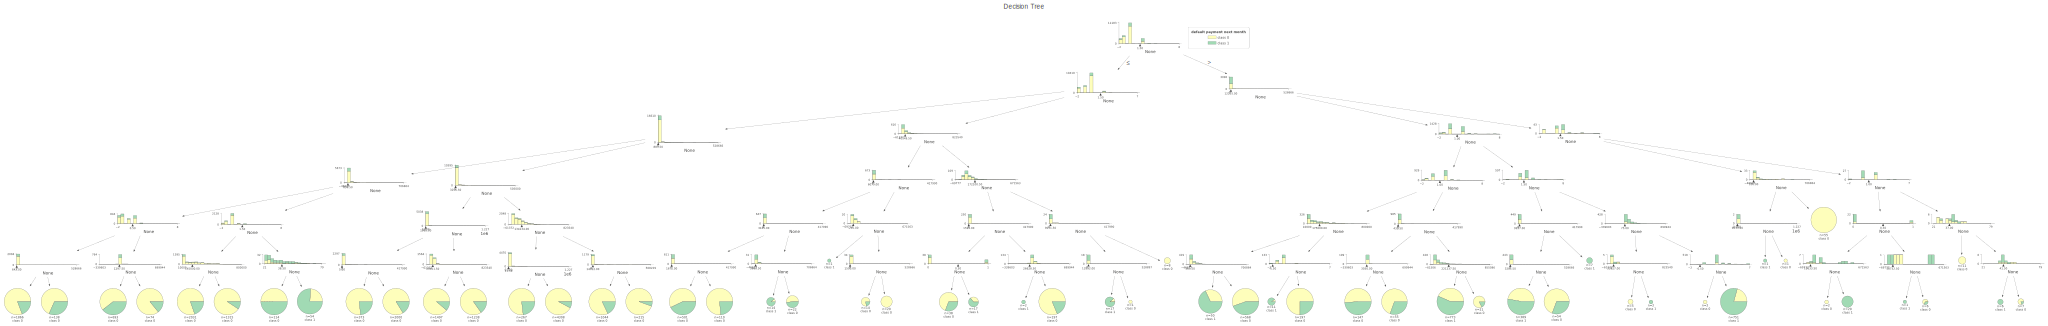

In [241]:
import dtreeviz

rf=RandomForestClassifier(max_depth=6, n_estimators=50)

data_train=data.drop(["default payment next month"], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(data_train, data['default payment next month'].values,
test_size=0.2, random_state=24)

rf.fit(X_train,y_train)
model=rf.estimators_[0]


trees.dtreeviz(model, x_data=X_train,y_data=y_train,target_name='default payment next month',title="Decision Tree")

In [242]:
model

DecisionTreeClassifier(max_depth=6, max_features='auto',
                       random_state=2058302512)

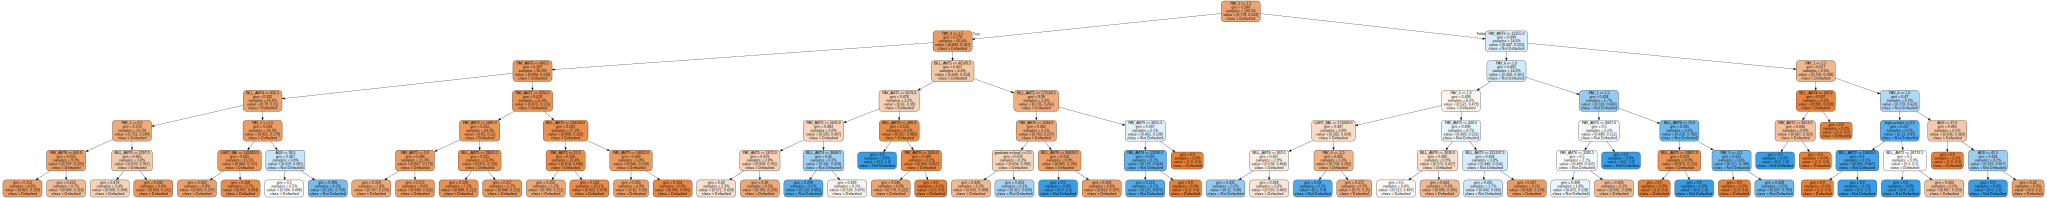

In [243]:
dot_data=tree.export_graphviz(model,out_file=None,filled=True,rounded=True,feature_names=data_train.columns, \
                              proportion=True,class_names=["Defaulted","Not Defaulted"])
graphviz.Source(dot_data)

In [246]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.84%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



<H4>XGBOOST<H4>

In [247]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [248]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier()

In [249]:
#parâmetros xgboost
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [251]:
accuracy_scorey_pred = xg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.84%


In [252]:
params_tree={'max_depth': [3,6,10,14],'n_estimators':[10,40,50,100]}

cv=GridSearchCV(xg,param_grid=params_tree,scoring='roc_auc',n_jobs=None,refit=True,
               cv=4, verbose=1,pre_dispatch=None,error_score=np.nan,return_train_score=True)

In [253]:
cv.fit(X_train,y_train)
cv_results_xgb_df=pd.DataFrame(cv.cv_results_)
cv_results_xgb_df.sort_values(by='mean_test_score',ascending=False).head(8)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
3,1.350011,0.011024,0.013673,0.000313,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.768995,0.773627,0.794715,0.782805,0.780036,0.009825,1,0.812996,0.811227,0.806099,0.809721,0.810011,0.002539
6,1.395982,0.010612,0.014784,0.000272,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.771094,0.772447,0.791772,0.782008,0.779330,0.008325,2,0.862561,0.858110,0.860769,0.856851,0.859573,0.002231
5,1.128582,0.011008,0.012769,0.000316,6,40,"{'max_depth': 6, 'n_estimators': 40}",0.770098,0.771810,0.791616,0.781391,0.778729,0.008596,3,0.850660,0.850541,0.850102,0.848741,0.850011,0.000762
7,2.676257,0.031028,0.024069,0.000729,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.769508,0.772273,0.791150,0.779835,0.778192,0.008382,4,0.889121,0.891872,0.888797,0.883693,0.888371,0.002953
2,1.107375,0.247337,0.010768,0.002034,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.767164,0.771690,0.790869,0.781152,0.777719,0.009117,5,0.798344,0.797281,0.791251,0.798069,0.796236,0.002904
1,1.285473,0.291212,0.015041,0.004785,3,40,"{'max_depth': 3, 'n_estimators': 40}",0.765702,0.771465,0.789085,0.780952,0.776801,0.008941,6,0.794007,0.793892,0.787460,0.793069,0.792107,0.002707
4,0.301370,0.005154,0.006173,0.000270,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.762461,0.769296,0.786440,0.775407,0.773401,0.008812,7,0.805432,0.805520,0.799987,0.803167,0.803526,0.002251
9,2.092840,0.019877,0.021196,0.000346,10,40,"{'max_depth': 10, 'n_estimators': 40}",0.764818,0.763215,0.786708,0.777032,0.772943,0.009577,8,0.961390,0.962828,0.958037,0.955258,0.959378,0.002947


In [262]:
#plotagem 3D

import plotly.express as px
fig = px.scatter_3d(cv_results_xgb_df, x="param_max_depth", y="mean_test_score", z="param_n_estimators")
fig.show()

<h3>Redes Neurais Artificiais<h3>

In [255]:
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [257]:
from sklearn.preprocessing import MinMaxScaler as scaler
data_train=data.drop(["default payment next month"], axis=1)
sc=scaler()
data_tr=sc.fit_transform(X=data_train)

X_train, X_test, y_train, y_test = train_test_split(data_tr, data['default payment next month'].values,
test_size=0.2, random_state=24)

In [258]:
input_neurons=X_train.shape[1]
output_neurons=1

number_of_hidden_layers=3
neuron_hidden_layer_1=100
neuron_hidden_layer_2=60
neuron_hidden_layer_3=30

model= Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="relu"))
model.add(Dense(units=neuron_hidden_layer_2,activation="relu"))
model.add(Dense(units=neuron_hidden_layer_3,activation="relu"))
model.add(Dense(units=output_neurons,activation="sigmoid"))

In [259]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [260]:
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
427/427 [==============================] - 3s 4ms/step - loss: 0.4878 - accuracy: 0.7945
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4515 - accuracy: 0.8151
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8165
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.8200
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4410 - accuracy: 0.8201
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.8190
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.8207
Epoch 8/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8198
Epoch 9/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4349 - accuracy: 0.8197
Epoch 10/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.8208

In [261]:
from sklearn.metrics import accuracy_score
yhat = model.predict(X_test)
acc = accuracy_score(y_test,yhat.round())
print('Accuracy: %.3f' % acc)

167/167 [==============================] - 0s 878us/step
Accuracy: 0.819


In [263]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [264]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    input_neurons=X_train.shape[1]
    output_neurons=1

    number_of_hidden_layers=3
    neuron_hidden_layer_1=10
    neuron_hidden_layer_2=6
    neuron_hidden_layer_3=3

    model= Sequential()
    model.add(InputLayer(input_shape=(input_neurons,)))
    model.add(Dense(units=neuron_hidden_layer_1,activation="relu"))
    model.add(Dense(units=neuron_hidden_layer_2,activation="relu"))
    model.add(Dense(units=neuron_hidden_layer_3,activation="relu"))
    model.add(Dense(units=output_neurons,activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,scoring="accuracy")
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:302: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Best: 0.820074 using {'batch_size': 80, 'epochs': 50}
0.805025 (0.020253) with: {'batch_size': 10, 'epochs': 10}
0.815902 (0.005581) with: {'batch_size': 10, 'epochs': 50}
0.818902 (0.003435) with: {'batch_size': 10, 'epochs': 100}
0.815714 (0.002145) with: {'batch_size': 20, 'epochs': 10}
0.819887 (0.002210) with: {'batch_size': 20, 'epochs': 50}
0.816464 (0.005224) with: {'batch_size': 20, 'epochs': 100}
0.816183 (0.002835) with: {'batch_size': 40, 'epochs': 10}
0.818012 (0.004067) with: {'batch_size': 40, 'epochs': 50}
0.817824 (0.002583) with: {'batch_size': 40, 'epochs': 100}
0.813886 (0.003183) with: {'batch_size': 60, 'epochs': 10}
0.819277 (0.002991) with: {'batch_size': 60, 'epochs': 50}
0.817965 (0.003815) with: {'batch_size': 60, 'epochs': 100}
0.813230 (0.001976) with: {'batch_size': 80, 'epochs': 10}
0.820074 (0.003321) with: {'batch_size': 80, 'epochs': 50}
0.818152 (0.003909) with: {'batch_size': 80, 'epochs': 100}
0.799353 (0.016051) with: {'batch_size': 100, 'epochs': 